In [ ]:
!pip install lucifer-ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 11.7 MB/s eta 0:00:00


In [ ]:
 from luciferml.supervised.classification import Classification

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
star = pd.read_csv ('6 class csv.csv')
star.head()

star.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [ ]:
star.shape

(240, 7)

In [ ]:
star.isnull().sum() #???

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [ ]:
star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [ ]:
star.describe().T.style.bar(
    subset=['mean'],
    color='#606ff2').background_gradient(
    subset=['std'], cmap='PuBu').background_gradient(subset=['50%'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
Temperature (K),240.000000,10497.462500,9552.425037,1939.000000,3344.250000,5776.000000,15055.500000,40000.000000
Luminosity(L/Lo),240.000000,107188.361635,179432.244940,0.000080,0.000865,0.070500,198050.000000,849420.000000
Radius(R/Ro),240.000000,237.157781,517.155763,0.008400,0.102750,0.762500,42.750000,1948.500000
Absolute magnitude(Mv),240.000000,4.382396,10.532512,-11.920000,-6.232500,8.313000,13.697500,20.060000
Star type,240.000000,2.500000,1.711394,0.000000,1.000000,2.500000,4.000000,5.000000


In [ ]:
features = star.iloc[:, :-1]
labels = star.iloc[:, -1]

In [ ]:
accuracy_scores =  {}


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝
 

Started LuciferML [ ✓ ]

Preprocessing Started [*]

Encoding Features [*]

Preprocessing Done [ ✓ ]

Training Decision Tree Classifier on Training Set [*]

Model Trained Successfully [ ✓ ]

Evaluating Model Performance [*]

        Validation Accuracy is : 91.67 %
        KFold Accuracy: 89.58 %
        Standard Deviation: 4.08 % 



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Building Confusion Matrix Failed with error : The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of labels (6). 

Model Evaluation Completed [ ✓ ]

Completed LuciferML Run [ ✓ ]

Time Elapsed :  0.23 seconds 



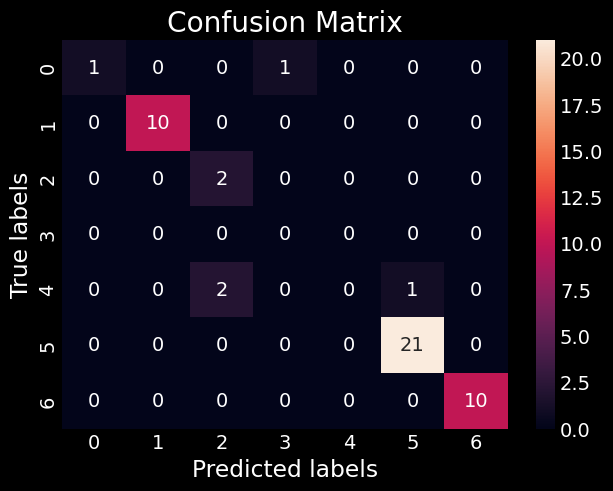

In [ ]:
#arboles de decisión
params = {'criterion': 'entropy', 'max_depth': 15, 'max_features': 2, 'splitter': 'best', 'random_state': 42}
classifier =  Classification(predictor = 'dt',params=params)
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝
 

Started LuciferML [ ✓ ]

Preprocessing Started [*]

Encoding Features [*]

Preprocessing Done [ ✓ ]

Training Support Vector Machine on Training Set [*]

Model Trained Successfully [ ✓ ]

Evaluating Model Performance [*]

        Validation Accuracy is : 91.67 %
        KFold Accuracy: 92.68 %
        Standard Deviation: 4.24 % 



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


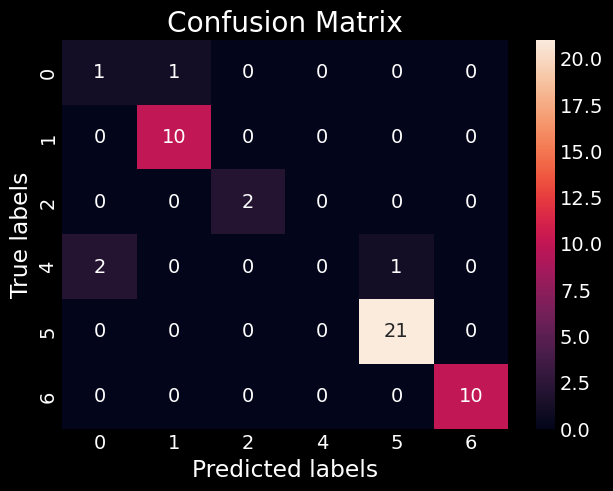

Model Evaluation Completed [ ✓ ]

Completed LuciferML Run [ ✓ ]

Time Elapsed :  0.44 seconds 



In [ ]:
#support vector machine
params = {'C': 11.288378916846883, 'gamma': 0.001, 'kernel': 'linear'}
classifier =  Classification(predictor = 'svm',params=params)
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝
 

Started LuciferML [ ✓ ]

Preprocessing Started [*]

Encoding Features [*]

Preprocessing Done [ ✓ ]

Training K-Nearest Neighbours on Training Set [*]

Model Trained Successfully [ ✓ ]

Evaluating Model Performance [*]

        Validation Accuracy is : 93.75 %
        KFold Accuracy: 91.66 %
        Standard Deviation: 4.82 % 



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


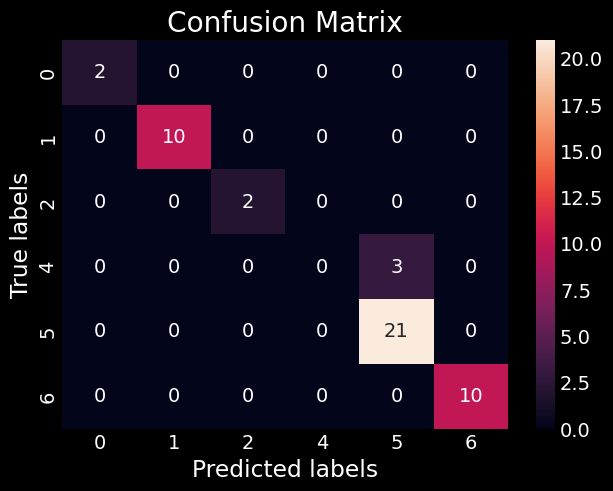

Model Evaluation Completed [ ✓ ]

Completed LuciferML Run [ ✓ ]

Time Elapsed :  0.49 seconds 



In [ ]:
#KNN
params = {'algorithm': 'auto', 'n_jobs': 1, 'n_neighbors': 6, 'weights': 'distance'}
classifier =  Classification(predictor = 'knn',params=params)
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']

In [ ]:
"analisis de gráficos"
fig = px.bar(star, y = 'Spectral Class',color="Star type", template = 'plotly_dark')
fig.show()
#Los gráficos anteriores muestran la distribución de tipos de estrellas entre clases espectrales.

In [ ]:
fig = px.histogram(star, y="Spectral Class", x="Star type", color="Temperature (K)",
                   hover_data=star.columns, template = 'plotly_dark', title = 'Spectral Class and Star Type with their temperatures')
fig.show()
#Los gráficos anteriores muestran las clases espectrales con tipos de estrellas representados por sus temperaturas.

<ipython-input-17-6a7390dc6f40>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




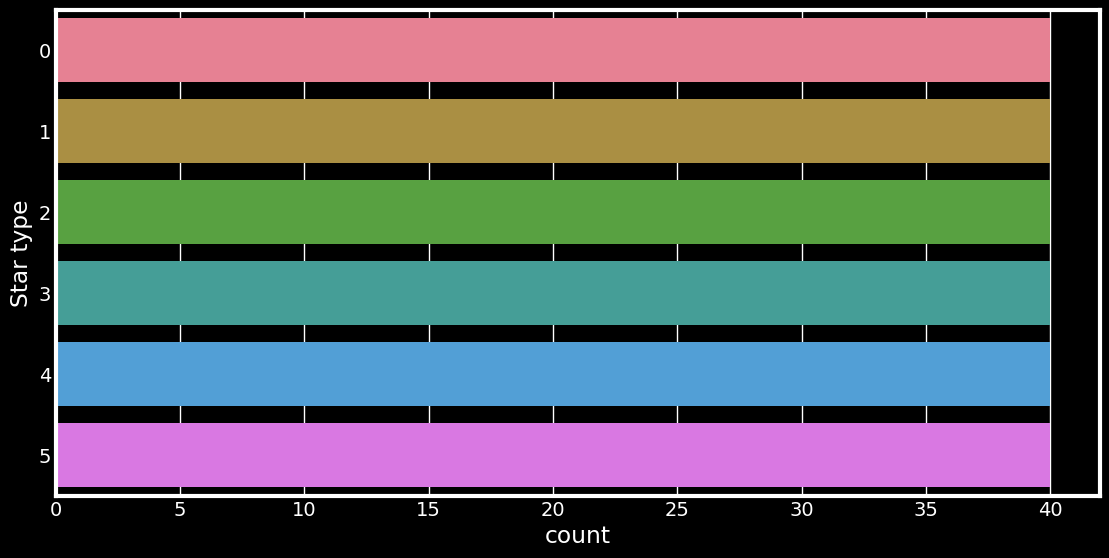

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y="Star type", data=star, palette='husl');
#El gráfico anterior muestra que hay 40 valores para cada tipo de estrella

<ipython-input-18-97077b261b62>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




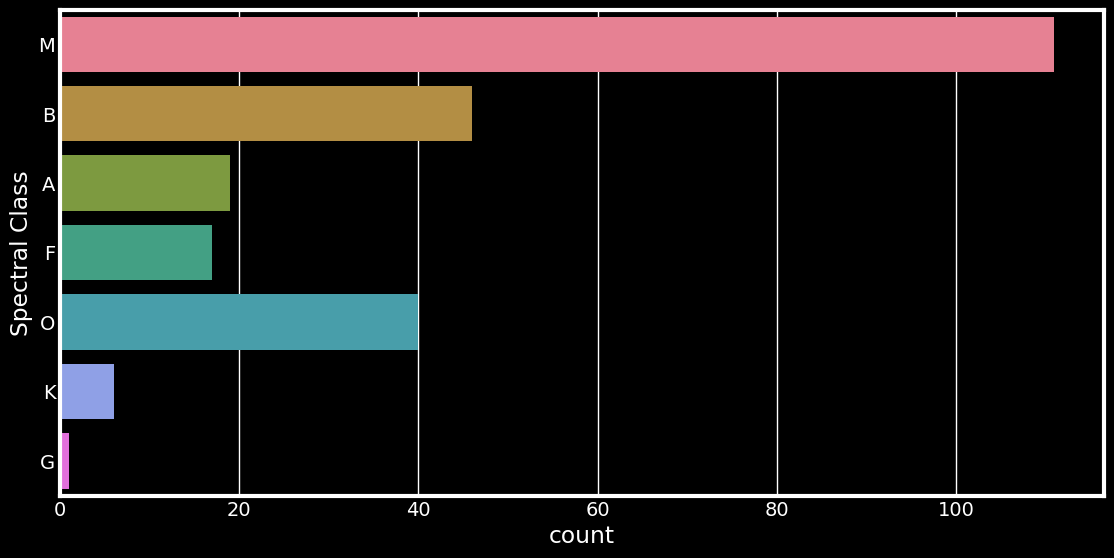

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y="Spectral Class", data=star, palette='husl');
#El gráfico anterior muestra el recuento de cada clase espectral

In [ ]:
fig = px.scatter(star,
                 x="Star type", y='Absolute magnitude(Mv)', size="Radius(R/Ro)", color="Temperature (K)",
                 log_x=True, size_max=60,
                 template='plotly_dark', title='Star Type vs Absolute Magnitude')
fig.show()
#El gráfico anterior muestra la magnitud absoluta de diferentes tipos de estrellas intensificada por sus respectivas temperaturas y su tamaño es la representación de su radio.

In [ ]:
fig = px.density_heatmap(star, x="Radius(R/Ro)", y ="Luminosity(L/Lo)",title = 'Radius vs Luminosity', template = 'plotly_dark')
fig.show()


In [ ]:
fig = px.density_heatmap(star, x="Temperature (K)", y ="Absolute magnitude(Mv)",title = 'Temperature vs Absolute Magnitude', template = 'plotly_dark')
fig.show()
#Del gráfico anterior podemos concluir que la temperatura no es linealmente proporcional a su magnitud.

In [ ]:
fig = px.scatter_ternary(star, a="Absolute magnitude(Mv)", b="Luminosity(L/Lo)", c="Radius(R/Ro)",hover_name="Star type",
    color="Temperature (K)", template = 'plotly_dark',size="Temperature (K)", size_max=30,)
fig.show()


In [ ]:
fig = px.scatter_3d(star, x='Star type', y='Absolute magnitude(Mv)', z='Spectral Class',
              color='Temperature (K)', template = 'plotly_dark', title = 'Distribution of Star type and Spectral Class with their Magnitudes')
fig.show()


In [ ]:
fig = px.box(star, x="Star type", y="Temperature (K)", template = 'plotly_dark',
             title = 'Representation of Type of Stars with Temperature')
fig.show()


In [ ]:
fig = px.pie(star, names='Spectral Class', values='Temperature (K)', template = 'plotly_dark',
             title = 'Representation of Spectral Classes with their Temperature')
fig.show()

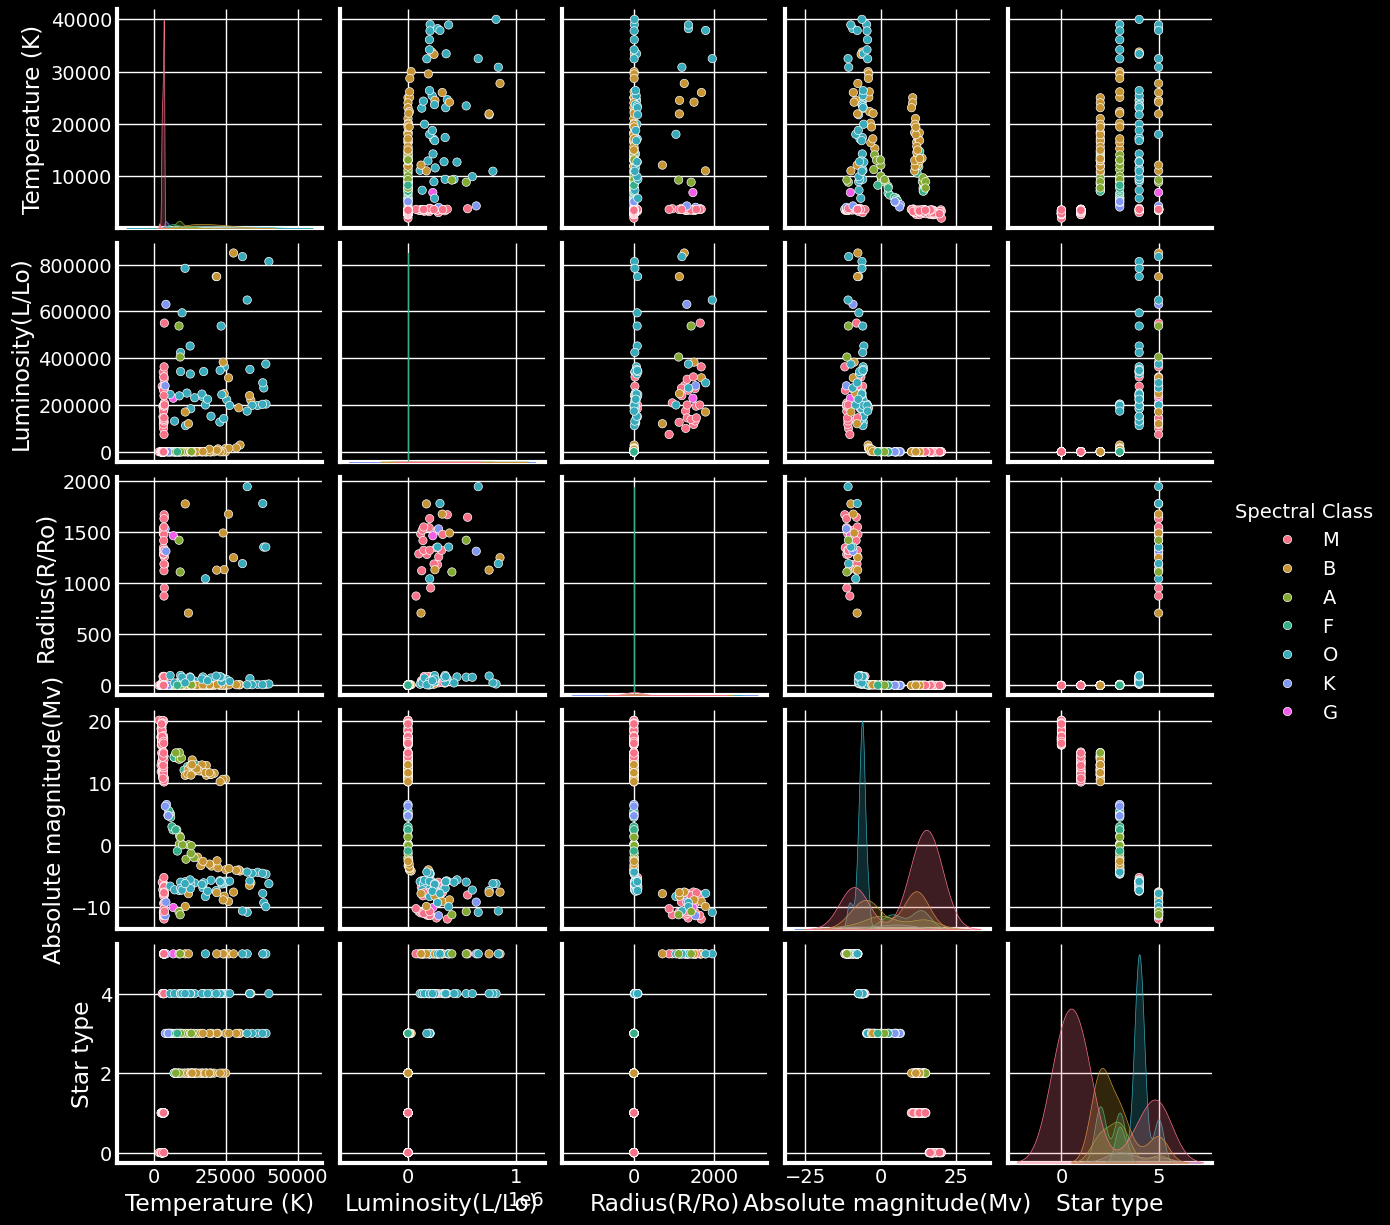

In [ ]:
sns.pairplot(star, hue="Spectral Class", palette="husl");